C:\Users\DELL\AppData\Local\Temp\ipykernel_12836\3900332523.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan.csv')


Overall Default Rate: 0.00%


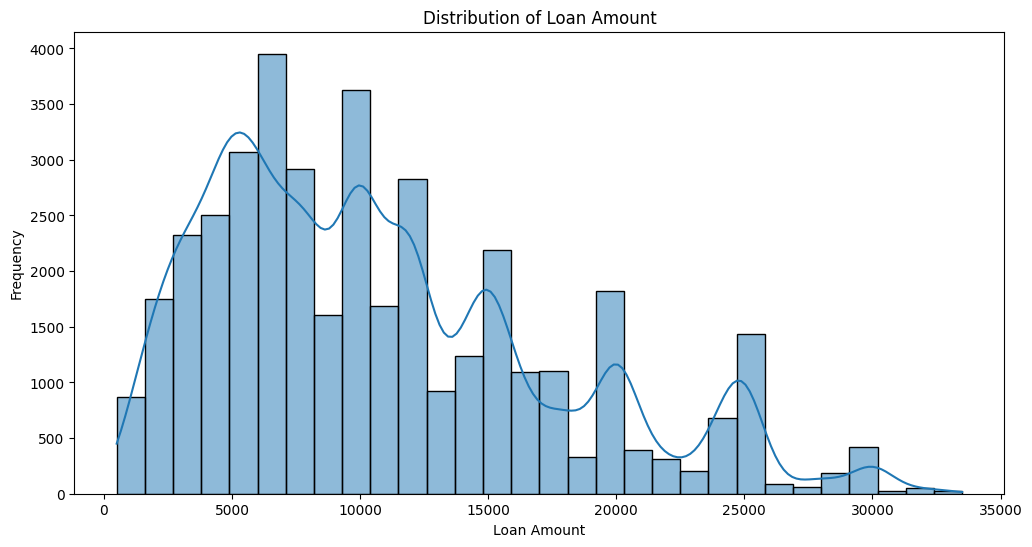

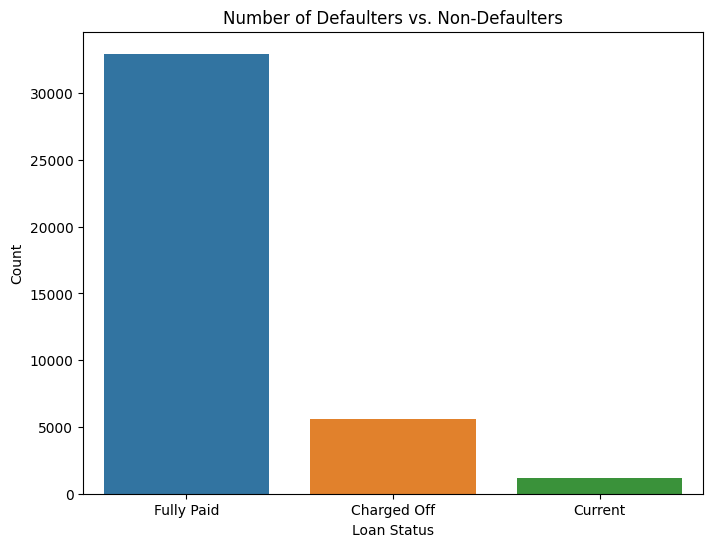

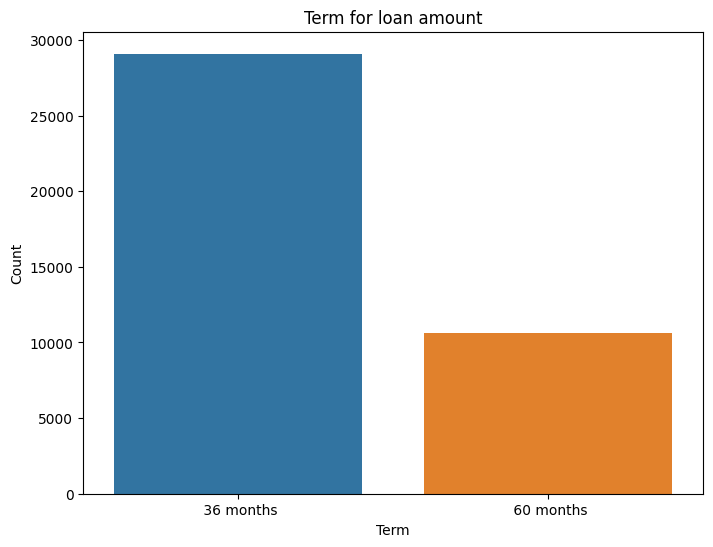

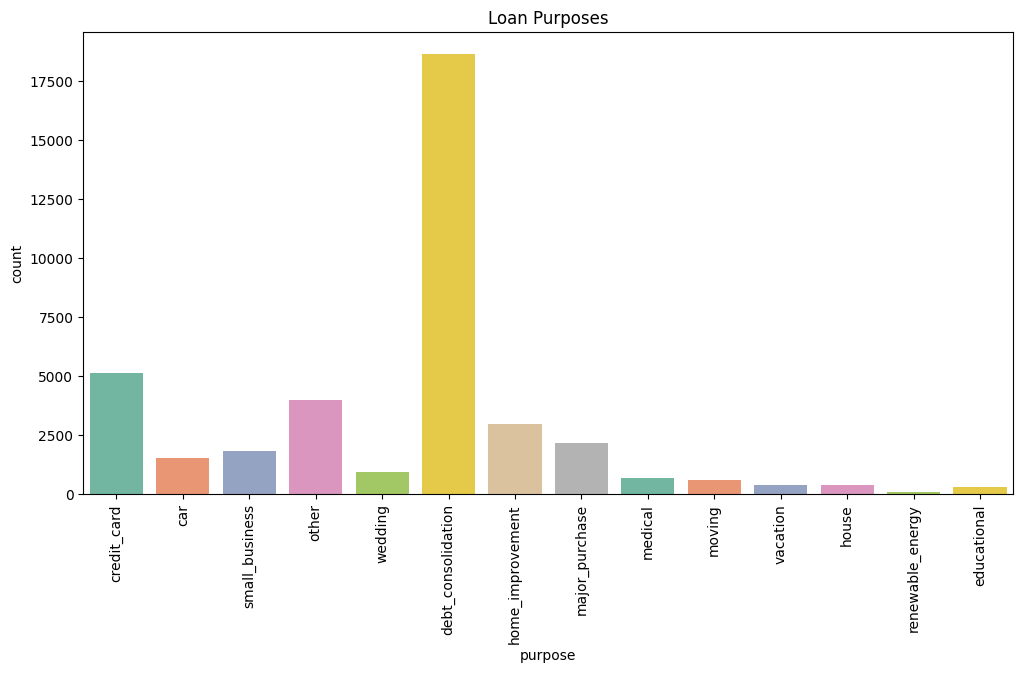

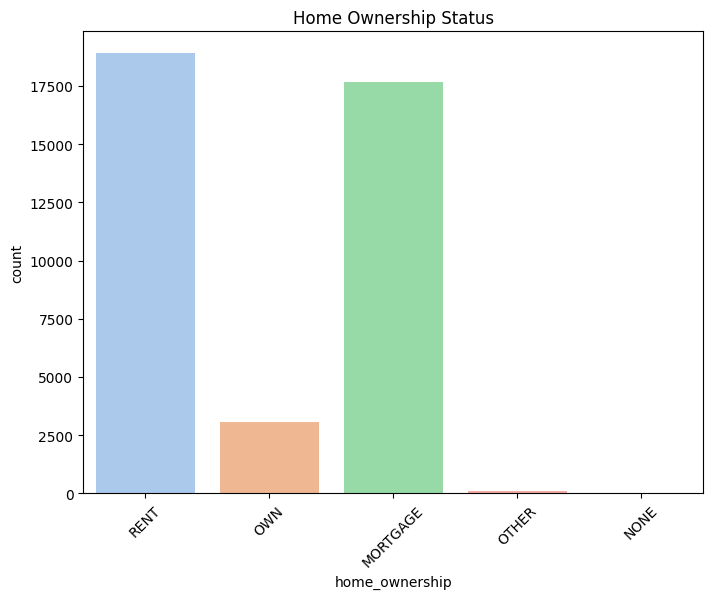

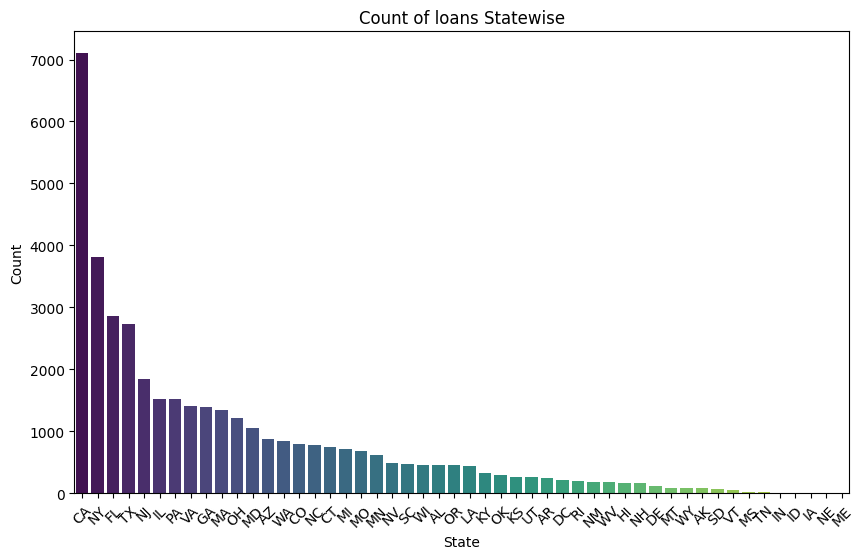

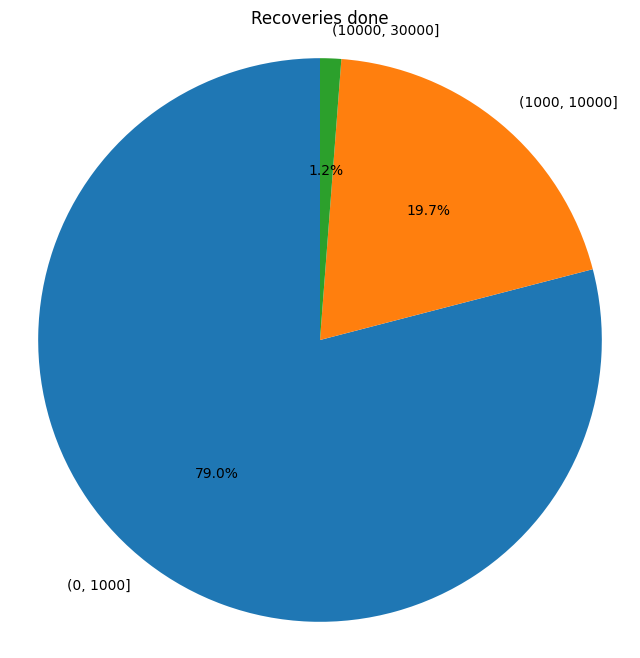

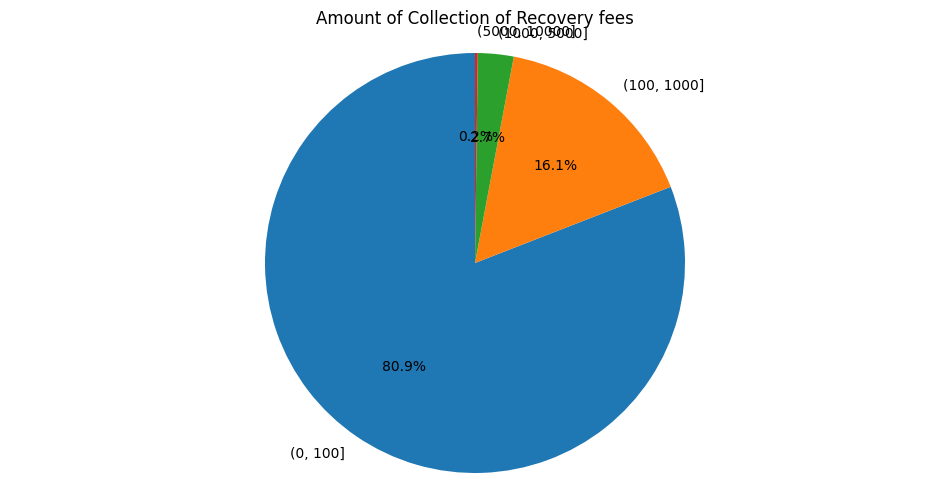

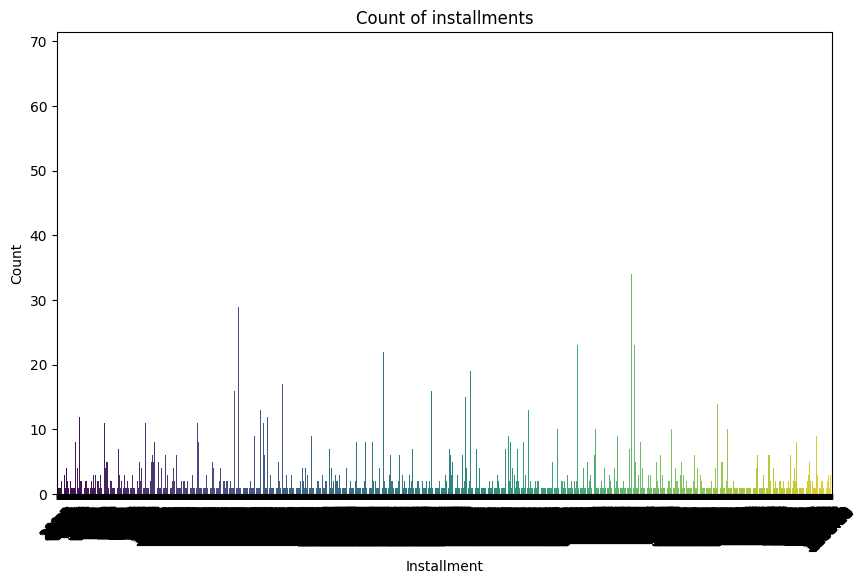

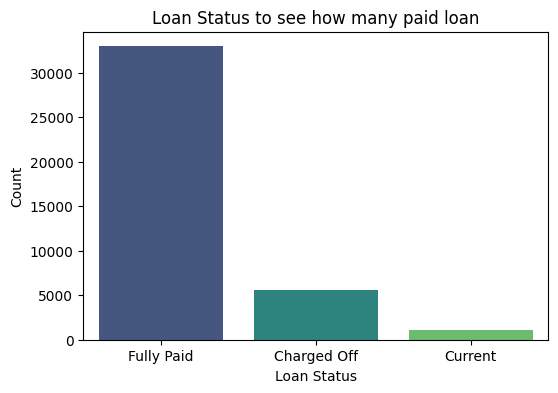

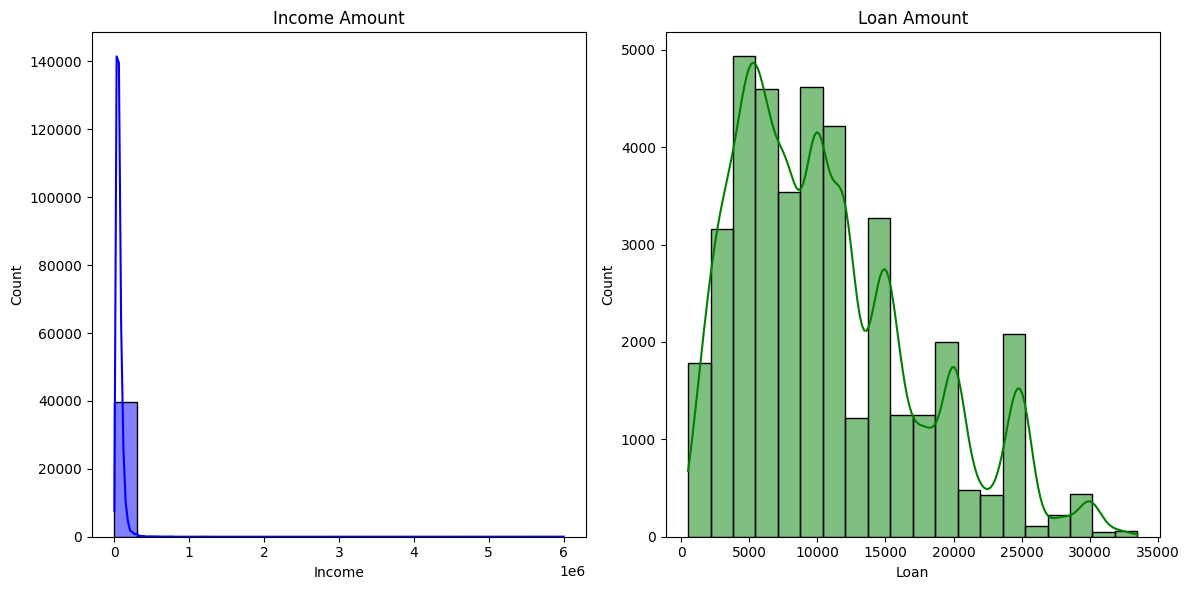

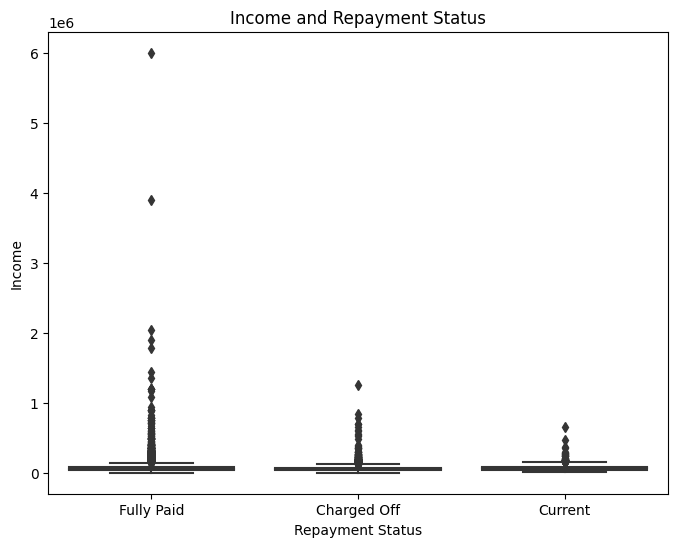

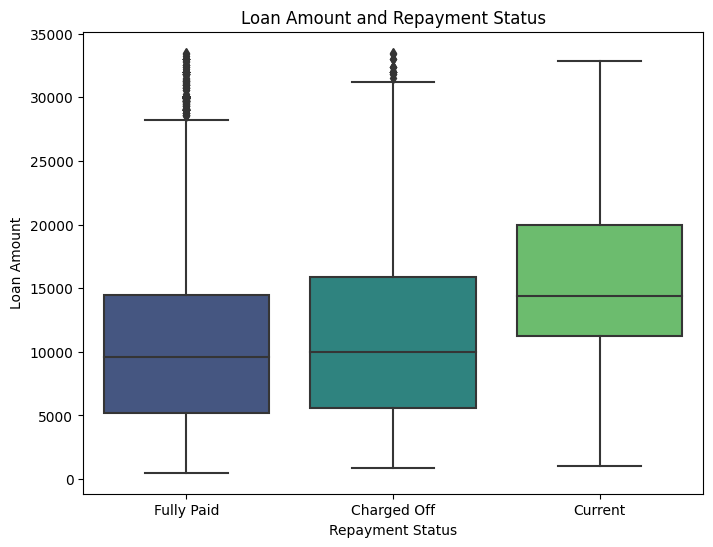

In [9]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('loan.csv')


# Handling missing values from emp_title column
data['emp_title'].fillna(data['emp_title'].mode()[0], inplace=True)
data['emp_title'].fillna('Missing', inplace=True)


#Applying 30% threshold to handle columns with many NA values
threshold = 0.3
missing_values = data.isnull().mean() 
cols_to_drop = missing_values[missing_values > threshold].index.tolist()
data.drop(columns=cols_to_drop, inplace=True) 


#Droping unnecessary columns from dataset
columns_to_delete = ['id', 'member_id', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
data = data.drop(columns= columns_to_delete)

# Outlier treatment for 'loan_amnt' column
loan_amnt_mean = data['loan_amnt'].mean()
loan_amnt_std = data['loan_amnt'].std()
data['loan_amnt'] = data['loan_amnt'].apply(lambda x: loan_amnt_mean if x > (loan_amnt_mean + 3 * loan_amnt_std) else x)


# Defining a custom function to calculate default rate
def calculate_default_rate(df):
    return (df['loan_status'] == 'Charged-off').mean()
	
	
	
# 1. Identifying potential of loan default to reduce credit losses.
# Univariate Analysis applied:
default_rate = calculate_default_rate(data)
print(f"Overall Default Rate: {default_rate:.2%}")

plt.figure(figsize=(12, 6))
sns.histplot(data['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()



# 2. Plotting how many defaulters vs non defaulters 
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=data)
plt.title('Number of Defaulters vs. Non-Defaulters')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()



# 3. For Term analysis to see how many customers take loan for what terms
plt.figure(figsize=(8, 6))
sns.countplot(x='term', data=data)
plt.title('Term for loan amount')
plt.xlabel('Term')
plt.ylabel('Count')
plt.show()




#For analysis of loan purpose
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', data=data, palette='Set2')
plt.title('Loan Purposes')
plt.xticks(rotation=90)
plt.show()




# Analyze home ownership types
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', data=data, palette='pastel')
plt.title('Home Ownership Status')
plt.xticks(rotation=45)
plt.show()




# Statewise analysis of Count of loans
value_counts = data['addr_state'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of loans Statewise')
plt.xticks(rotation=45)  
plt.show()



# Analysis of amount of Recoveries done
bins = [0, 1000, 10000, 30000]
data['recoveries'] = pd.cut(data['recoveries'], bins=bins)
category_counts = data['recoveries'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Recoveries done')
plt.axis('equal')  
plt.show()



# Analysis of amount of Collection of Recovery fees
bins = [0, 100, 1000, 5000, 10000]
data['collection_recovery_fee'] = pd.cut(data['collection_recovery_fee'], bins=bins)
category_counts = data['collection_recovery_fee'].value_counts()
plt.figure(figsize=(12, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Amount of Collection of Recovery fees')
plt.axis('equal')  
plt.show()



# People with high or low installments
value_counts = data['installment'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.xlabel('Installment')
plt.ylabel('Count')
plt.title('Count of installments')
plt.xticks(rotation=45)  
plt.show()



# Univariate Analysis of loan status which shows loan fully paid 
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='loan_status', palette='viridis')
plt.title('Loan Status to see how many paid loan')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()



# Analysis of income and loan amount - numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='annual_inc', bins=20, kde=True, color='blue')
plt.title('Income Amount')
plt.xlabel('Income')
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='loan_amnt', bins=20, kde=True, color='green')
plt.title('Loan Amount')
plt.xlabel('Loan')
plt.tight_layout()
plt.show()



# Inncome and Repayment_status - Bivariate Analysis
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='loan_status', y='annual_inc', palette='viridis')
plt.title('Income and Repayment Status')
plt.xlabel('Repayment Status')
plt.ylabel('Income')
plt.show()

# Relationship between 'loan_amount' and 'repayment_status'
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='loan_status', y='loan_amnt', palette='viridis')
plt.title('Loan Amount and Repayment Status')
plt.xlabel('Repayment Status')
plt.ylabel('Loan Amount')
plt.show()



